## <div style="text-align: center; color: red">Gradient Descent Algorithm</div>

#### Below is the gradient descent algorithm for Age vs. Charges line for non-smoking people

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('medical.csv')
non_smokers = data[data.smoker == 'no']

In [120]:
''' Computation time is much longer   (for 500 iterations it takes around 2-3 minutes)

def step_gradient(w_current, b_current, points, learning_rate):
    w_gradient = 0
    b_gradient = 0

    n = len(points)

    for i in range(n):
        x = points.iloc[i].age
        y = points.iloc[i].charges

        w_gradient += -(2/n) * x * (y - (w_current * x + b_current))
        b_gradient += -(2/n) * (y - (w_current * x + b_current))

    w = w_current - learning_rate * w_gradient
    b = b_current - learning_rate * b_gradient

    return w, b 

'''

# Using numpy to reduce the computation time and increase efficiency    (for 1 lakh iterations it takes around 5 seconds)
def step_gradient(w_current, b_current, points, learning_rate):
    x = points['age'].values     # NumPy array
    y = points['charges'].values  # NumPy array

    n = len(points)

    # Vectorized computation of gradients
    y_predicted = w_current * x + b_current    # NumPy array
    error = y - y_predicted    # NumPy array

    w_gradient = -(2/n) * np.dot(x, error)     # np.dot sums the element-wise products of the two numpy arrays
    b_gradient = -(2/n) * np.sum(error)        # np.sum sums all the values of numpy array

    w = w_current - learning_rate * w_gradient
    b = b_current - learning_rate * b_gradient

    return w, b

In [111]:
def gradient_descent(points, starting_w, starting_b, learning_rate, num_iterations):
    w = starting_w
    b = starting_b
    for i in range(num_iterations):
        w, b = step_gradient(w, b, points, learning_rate)
        if (i + 1) % 1000 == 0:
            print(f"Steps: {i+1}, w: {w}, b: {b}")
    return w, b

In [121]:
# Training our own linear regression model using gradient descent

# Initial parameters:
# w: initial weight
# b: initial bias
# learning_rate: step size for each iteration of gradient descent
# num_iterations: number of iterations to run gradient descent

w = 0
b = 0
learning_rate = 0.0001
num_iterations = 100000

w, b = gradient_descent(non_smokers, w, b, learning_rate, num_iterations)

Steps: 1000, w: 221.1045843794301, b: -41.98126853149978
Steps: 2000, w: 222.1377104665648, b: -87.86619661490121
Steps: 3000, w: 223.14770587767217, b: -132.7238063300483
Steps: 4000, w: 224.13508848581733, b: -176.57709832385993
Steps: 5000, w: 225.10036456939744, b: -219.44855828141417
Steps: 6000, w: 226.04402907173466, b: -261.3601684554354
Steps: 7000, w: 226.96656585485746, b: -302.333418937651
Steps: 8000, w: 227.8684479475998, b: -342.38931867778876
Steps: 9000, w: 228.7501377881457, b: -381.5484062558766
Steps: 10000, w: 229.6120874611436, b: -419.83076041335335
Steps: 11000, w: 230.4547389295116, b: -457.25601034840383
Steps: 12000, w: 231.27852426105318, b: -493.84334578079034
Steps: 13000, w: 232.0838658499991, b: -529.6115267913409
Steps: 14000, w: 232.8711766335891, b: -564.5788934411403
Steps: 15000, w: 233.64086030380457, b: -598.7633751753629
Steps: 16000, w: 234.39331151436096, b: -632.1825000165564
Steps: 17000, w: 235.1289160830655, b: -664.8534035520967
Steps: 180

In [118]:
print(w)
print(b)

267.2489128242797
-2091.4205562577467


In [109]:
# Mean squared error
def error(w, b, data):
    total_error = 0
    for i in range(len(data)):
        x = data.iloc[i].age
        y = data.iloc[i].charges
        total_error += (y - (w * x + b)) ** 2
    return total_error / float(len(data))

RMSE:  4662.505766636394


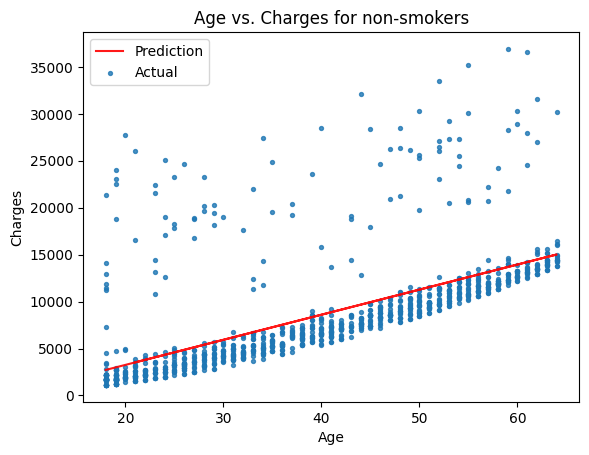

In [119]:
def estimate_charges(age, w, b):
    return w * age + b
def try_parameters(w, b):
    ages = non_smokers.age
    targets = non_smokers.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.title('Age vs. Charges for non-smokers')
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, targets, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    mse = error(w, b, non_smokers)
    rmse = np.sqrt(mse)      # Root Mean Squared Error
    print("RMSE: ",rmse)

try_parameters(w, b)